🎓 **Welcome to My Student Performance Analysis Portfolio!** 📚  

Ever wondered what truly impacts a student’s success in exams? 🌟 In this project, I explored a rich dataset from Kaggle, formatted as CSV, which dives deep into various factors shaping academic performance. From study habits 📖 and attendance 🎯 to parental involvement 🤝 and educational resources 📋, this dataset paints a comprehensive picture of what drives student achievement.  

My journey began with **data wrangling** 🛠️, where I tackled challenges like missing values, inconsistent data formats, and duplicate entries. Once the data was polished and ready, I dove into **Exploratory Data Analysis (EDA)** to uncover insightful trends, such as the relationship between motivational levels 💡, resource availability, and exam performance.  

To bring it all together, I crafted and answered key questions, including:  
- 📈 **Correlation Analysis:** Which factor has the strongest influence on exam scores?  
- ⏳ **Study Time by School Type:** How do private and public school students compare in hours studied per week?  
- 🧑‍🏫 **Teacher Quality:** How does the quality of teachers affect average exam scores?  
- 🎭 **Extracurricular Participation:** Do students who engage in extracurricular activities outperform their peers?  
- 📝 **Tutoring Insights:** How many tutoring sessions do top-performing students attend?  

This analysis highlights the power of data in understanding the intricate dynamics of education. Ready to explore the stories hidden in student performance data? Let’s dive in! 🎓✨

# Data Gathering

Data Source : https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

1. Hours_Studied	: Number of hours spent studying per week.
2. Attendance:	Percentage of classes attended.
3. Parental_Involvement :	Level of parental involvement in the student's education (Low, Medium, High).
4. Access_to_Resources :	Availability of educational resources (Low, Medium, High).
5. Extracurricular_Activities : Participation in extracurricular activities (Yes, No).
6. Sleep_Hours :	Average number of hours of sleep per night.
7. Previous_Scores :	Scores from previous exams.
8. Motivation_Level:	Student's level of motivation (Low, Medium, High).
9. Internet_Access:	Availability of internet access (Yes, No).
10. Tutoring_Sessions :	Number of tutoring sessions attended per month.
11. Family_Income :	Family income level (Low, Medium, High).
12. Teacher_Quality :	Quality of the teachers (Low, Medium, High).
13. School_Type : Type of school attended (Public, Private).
14. Peer_Influence : Influence of peers on academic performance (Positive, Neutral, Negative).
15. Physical_Activity	: Average number of hours of physical activity per week.
16. Learning_Disabilities	: Presence of learning disabilities (Yes, No).
17. Parental_Education_Level	: Highest education level of parents (High School, College, Postgraduate).
18. Distance_from_Home :	Distance from home to school (Near, Moderate, Far).
19. Gender: Gender of the student (Male, Female).
20. Exam_Score: Final exam score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# student_performance_df = pd.read_csv('/Users/anakagungngurahanandasuryawedhana/Documents/learning material/DS/surya-wedhana-data-analysis-portofolio/StudentPerformanceFactors.csv')
student_performance_df = pd.read_csv('StudentPerformanceFactors.csv')
student_performance_df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2551,9,86,High,Medium,No,8,65,High,Yes,0,Medium,Medium,Public,Positive,3,No,College,Near,Female,66
1085,23,93,Medium,Low,Yes,8,51,High,No,0,Low,High,Private,Positive,1,No,High School,NaN,Male,67
4433,17,84,Medium,High,Yes,8,60,Medium,Yes,0,Low,Low,Private,Positive,5,No,College,Near,Female,67
4554,20,71,Low,Medium,Yes,9,68,Medium,Yes,1,Low,Medium,Private,Positive,3,No,High School,Far,Male,63
6559,28,72,Low,Medium,Yes,7,60,Medium,Yes,4,High,Medium,Public,Neutral,3,No,Postgraduate,Near,Male,69


# Data Wrangling

In [ ]:
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

According to the analysis, three columns contain missing values: `Parental_Education_Level`, `Distance_from_Home`, and `Teacher_Quality`. Additionally, the analysis confirms that there are no formatting inconsistencies in any column within this dataframe.

In [ ]:
student_performance_df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In this dataset, `Teacher_Quality` have 78 missing value, `Parental_Education_Level` have 90 missing value, `Distance_from_Home` have 67 missing value

## Here is the part to filling the missing value

In [ ]:
student_performance_df.Teacher_Quality.unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [ ]:
student_performance_df['Teacher_Quality'].fillna(student_performance_df['Teacher_Quality'].mode().iloc[0], inplace=True)

<ipython-input-6-5a1eca248b42>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_df['Teacher_Quality'].fillna(student_performance_df['Teacher_Quality'].mode().iloc[0], inplace=True)


In [ ]:
student_performance_df.Parental_Education_Level.unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [ ]:
student_performance_df['Parental_Education_Level'].fillna(student_performance_df['Parental_Education_Level'].mode().iloc[0], inplace=True)

<ipython-input-8-43bc45d48011>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_df['Parental_Education_Level'].fillna(student_performance_df['Parental_Education_Level'].mode().iloc[0], inplace=True)


In [ ]:
student_performance_df.Distance_from_Home.unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [ ]:
student_performance_df['Distance_from_Home'].fillna(student_performance_df['Distance_from_Home'].mode().iloc[0], inplace=True)

<ipython-input-10-20e393c9033e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_df['Distance_from_Home'].fillna(student_performance_df['Distance_from_Home'].mode().iloc[0], inplace=True)


## Handling Outlier

In [ ]:
# This code replaces outliers in all columns containing numerical values.

numerical_columns = student_performance_df.select_dtypes(include=['number'])
numerical_columns.iloc[:,1:].columns

for column in numerical_columns:
  if column != 'Exam_Score' and column != 'Previous_Scores':
    Q1 = np.percentile(student_performance_df[column], 25)
    Q3 = np.percentile(student_performance_df[column], 75)
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    iqr_outliers = student_performance_df[(student_performance_df[column] < lower_bound) | (student_performance_df[column] > upper_bound)]
    if len(iqr_outliers) > 0:
      outliers = (student_performance_df[column] < lower_bound) | (student_performance_df[column] > upper_bound)
      median_value = student_performance_df[column].median()
      student_performance_df.loc[outliers, column] = median_value

## Duplicated Value

In [ ]:
print(student_performance_df.duplicated().sum())

0


According to the analysis, there's no duplicated value on this dataframe

## Describing Data

In [ ]:
student_performance_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.969426,79.977448,7.02906,75.070531,1.273649,2.967610,67.235659
std,5.809310,11.547475,1.46812,14.399784,0.953922,1.031231,3.890456
min,4.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.00000,100.000000,3.000000,6.000000,101.000000


**Table Description**

1. The **highest number of hours studied** by a student is **44 hours per week**, while the **minimum is 1 hour per week**, with an **average of 19.9 hours per week**.  
2. The **minimum attendance** recorded is **60%**.  
3. The **maximum sleep duration** is **10 hours per night**, while the **minimum is 4 hours per night**.  
4. The **lowest previous exam score** is **55**, and the **highest is recorded as 101**, which is likely an error. It would be better to correct this to **100**. The **average score is 67.2**.  
5. The **maximum number of tutoring sessions** attended by a student is **8 times per month**.  
6. The **highest average number of hours of physical activity per week** is **6 hours**.  

## Handling wrong value

In [ ]:
student_performance_df['Exam_Score'].replace(101, 100, inplace=True)

<ipython-input-14-d90bb9e285fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_df['Exam_Score'].replace(101, 100, inplace=True)


# EDA

In [ ]:
student_performance_df = student_performance_df.reset_index()
# we make a new column called student id because
student_performance_df.rename(columns={'index': 'student_id'}, inplace=True)

In [ ]:
student_performance_df.groupby(by='Motivation_Level').student_id.count().sort_values(ascending=False).reset_index()

,Motivation_Level,student_id
0,Medium,3351
1,Low,1937
2,High,1319


**Student Motivational Level**

- From the table above, **medium motivational level** is the most common among students, with **3,351 students**.  
- The second most common is **low motivational level**, with **1,937 students**.  
- Lastly, **high motivational level** is observed in **1,319 students**.  

In [ ]:
student_performance_df.groupby(by='Access_to_Resources').student_id.count().sort_values(ascending=False).reset_index()

,Access_to_Resources,student_id
0,Medium,3319
1,High,1975
2,Low,1313


**Availability of Educational Resources (Low, Medium, High)**

- From the table above, **medium availability of educational resources** is the most common, observed among **3,319 students**.  
- The second most common is **high availability of educational resources**, with **1,975 students**.  
- Lastly, **low availability of educational resources** is observed among **1,313 students**.  

In [ ]:
student_performance_df.groupby(by='Parental_Involvement').student_id.count().sort_values(ascending=False).reset_index()

,Parental_Involvement,student_id
0,Medium,3362
1,High,1908
2,Low,1337


**Level of parental involvement in the student's education (Low, Medium, High)**

- From the table above, **medium parental involvement in student's education** is the most common, recorded among **3,362 students**.  
- The second most common is **high parental involvement in student's education**, with **1,908 students**.  
- Lastly, **low parental involvement in student's education** is observed among **1,337 students**.  

In [ ]:
student_performance_df.groupby(by='Extracurricular_Activities').student_id.count().sort_values(ascending=False).reset_index()

,Extracurricular_Activities,student_id
0,Yes,3938
1,No,2669


**Student's Extracurricular Activities**

- From the table above, **3,938 students** are participating in extracurricular activities.  
- Conversely, **2,669 students** are not participating in extracurricular activities.  

In [ ]:
student_performance_df.groupby(by='Internet_Access').student_id.count().sort_values(ascending=False).reset_index()

,Internet_Access,student_id
0,Yes,6108
1,No,499


**Student's Internet Access**

- From the table above, **6,108 students** have internet access.  
- This is a significantly higher number compared to the **499 students** who do not have internet access.  

In [ ]:
student_performance_df.groupby(by='Family_Income').student_id.count().sort_values(ascending=False).reset_index()

,Family_Income,student_id
0,Low,2672
1,Medium,2666
2,High,1269


**Student's Family Income**

- According to the **Student's Family Income** table, the most common family income group is **low family income**, with **2,672 students**.  
- The second most common group is **medium family income**, with **2,666 students**.  
- Lastly, **high family income** is the least common, with only **1,269 students**.  

In [ ]:
student_performance_df.groupby(by='Teacher_Quality').student_id.count().sort_values(ascending=False).reset_index()

,Teacher_Quality,student_id
0,Medium,4003
1,High,1947
2,Low,657


**Student's Teacher Quality**

- According to the **Student's Teacher Quality** table, the most common teacher quality is **medium**, with **4,003 students** being taught by medium-quality teachers.  
- The second most common is **high-quality teachers**, who teach **1,947 students**.  
- Lastly, **low-quality teachers** teach only **657 students**, making this the lowest number among the teacher quality groups.

In [ ]:
student_performance_df.groupby(by='Peer_Influence').student_id.count().sort_values(ascending=False).reset_index()

,Peer_Influence,student_id
0,Positive,2638
1,Neutral,2592
2,Negative,1377


**Influence of Peers on Academic Performance**

- According to the table, **2,638 students** find that peers have a **positive influence** on their academic performance.  
- **2,592 students** consider the influence to be **neutral**.  
- Lastly, **1,377 students** believe that peers have a **negative influence** on their academic performance.  

In [ ]:
student_performance_df.groupby(by='Parental_Education_Level').student_id.count().sort_values(ascending=False).reset_index()

,Parental_Education_Level,student_id
0,High School,3313
1,College,1989
2,Postgraduate,1305


**Parental Education Level**

- According to the table, the **most common parental education level** is **High School**, with **3,313 parents** having graduated from high school.  
- The **second most common level** is **College**, with **1,989 parents** having completed a college degree.  
- Lastly, the **least common level** is **Postgraduate education**, with **1,305 parents** having achieved this level.  

In [ ]:
student_performance_df.groupby(by='School_Type').agg({
    'Hours_Studied' : 'mean'
})

,Hours_Studied
School_Type,
Private,19.967148
Public,19.970422


#Question




## **Highest Correlation to Exam Score**  
*    Identify which column has the **strongest correlation** with exam scores, and explain the relationship.

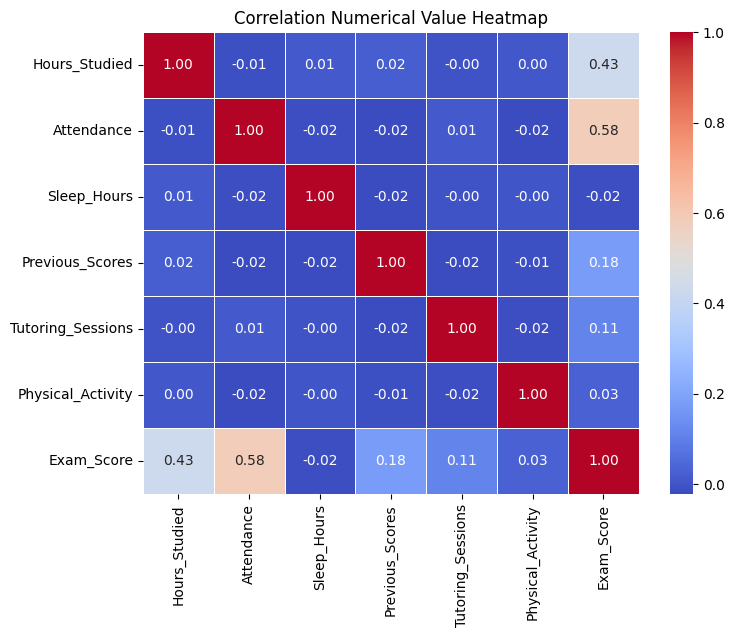

In [ ]:
numerical_columns = student_performance_df.select_dtypes(include=['number'])
numerical_columns.iloc[:,1:]

# Calculate the Pearson correlation
correlation_matrix = numerical_columns.iloc[:,1:].corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Numerical Value Heatmap')
plt.show()

In [ ]:
ordinal_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home']
nominal_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Peer_Influence','Learning_Disabilities','Gender']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column to numeric values
for column in ordinal_columns:
  student_performance_df[column] = label_encoder.fit_transform(student_performance_df[column])

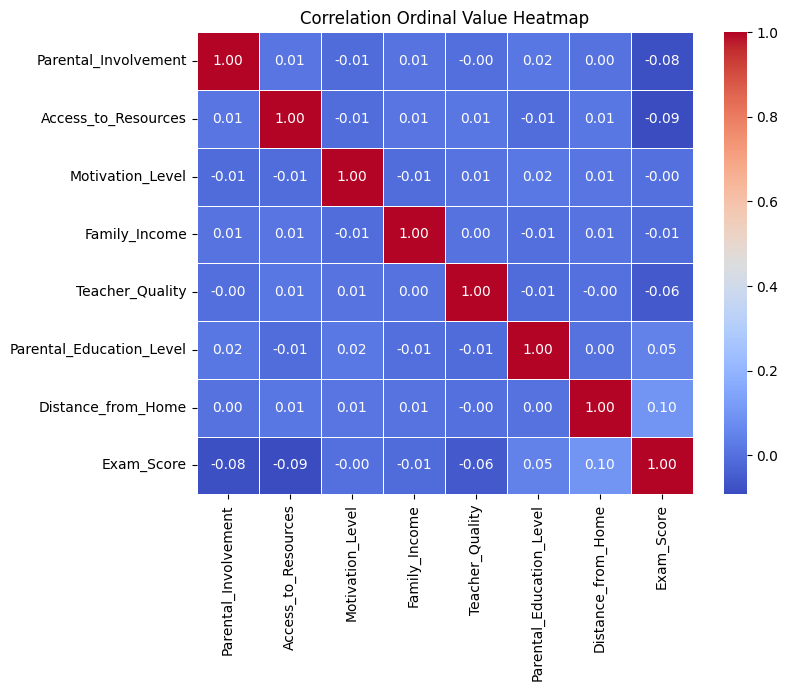

In [ ]:
# Calculate the Spearman correlation
correlation_matrix = student_performance_df[['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home', 'Exam_Score']].corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Ordinal Value Heatmap')
plt.show()

In [ ]:
from scipy.stats import pointbiserialr

nominal_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Peer_Influence','Learning_Disabilities','Gender']
correlations = []
for column in nominal_columns:
  correlation, p_value = pointbiserialr(student_performance_df[column], student_performance_df['Exam_Score'])
  correlations.append(correlation)

data = {
    'nominal_columns': nominal_columns,
    'correlations': correlations
}
nominal_columns_correlations = pd.DataFrame(data)
nominal_columns_correlations.sort_values(by='correlations',ascending=False)


,nominal_columns,correlations
3,Peer_Influence,0.100208
0,Extracurricular_Activities,0.064371
1,Internet_Access,0.051628
5,Gender,-0.001988
2,School_Type,-0.008872
4,Learning_Disabilities,-0.085081


**Exam Score Correlation Analysis**  

- Using the **Pearson, Spearman, and Point Biserial correlation method**, the **Percentage of Classes Attended** shows the **highest correlation** with exam scores, with a correlation coefficient of **0.58**.  
- The **second highest correlation** with exam scores is the **Number of Hours Spent Studying per Week**, which has a correlation coefficient of **0.43**.  
- These positive correlations (**0.58** and **0.43**) indicate that as the percentage of classes attended and the number of study hours per week increase, exam scores tend to improve.  
- The results suggest a **moderate positive relationship** between these factors and exam scores, emphasizing the importance of both attendance and study habits, while acknowledging that other variables might also significantly impact performance.  

## **Hours Studied per Week by School Type**  
Compare the **average, maximum, and minimum hours studied per week** between students from **private** and **public schools**.  

In [ ]:
student_performance_df.groupby(by='School_Type').agg({
    'Hours_Studied' : ['max','min','mean']
})

Hours_Studied               
                      max min       mean
School_Type                             
0                      36   4  19.967148
1                      36   4  19.970422

**Hours Studied per Week by School Type**  

- According to the data, there is no  difference in the highest number of hours spent studying per week between the two types of schools. Students in private schools and public schools report a maximum of **36 hours per week**
- Similarly, the **minimum time spent studying** per week is **4 hour** for both school types.  

## **Average Exam Scores by Teacher Quality**  
*    Compare the **average exam scores** among students based on the quality of their teachers (**high**, **medium**, or **low**).  

In [ ]:
student_performance_df.groupby(by='Teacher_Quality').agg({
    'Exam_Score' : ['max','min','mean']
})

Exam_Score               
                       max min       mean
Teacher_Quality                          
0                      100  58  67.676425
1                       94  58  66.753425
2                      100  55  67.100175


**Teacher Quality and Exam Scores**  

- **Maximum Exam Scores:**  
  - Students with **high** and **medium** teacher quality can achieve the **same maximum score** of **100**.  

- **Average Exam Scores:**  
  - Students across all teacher quality categories (**high**, **medium**, and **low**) have **similar average scores**, ranging between **66 and 67**.  

- **Minimum Exam Scores:**  
  - Students across all teacher quality categories have **similar minimum scores**, ranging between **55 and 58**.

## **Exam Performance and Extracurricular Participation**  
*    Determine which group of students—those who **participate in extracurricular activities** or those who do not—achieved **exam scores greater than 75**.

In [ ]:
high_exam_score_df = student_performance_df[student_performance_df['Exam_Score'] >= 75].copy()

In [ ]:
high_exam_score_df.groupby(by='Extracurricular_Activities').agg({
    'student_id' : 'count'
})

,student_id
Extracurricular_Activities,
0,37
1,87


**Extracurricular Activities and Exam Score**

- Based on the data, **87 students** who scored above **75** participate in **extracurricular activities**, indicating a higher proportion of high performers among this group.  
- Meanwhile, **37 students** who do not participate in extracurricular activities also achieved an exam score greater than **75**.  
- This suggests that participating in extracurricular activities may be associated with better academic performance, though non-participants can still achieve high scores.  

## **Tutoring Sessions for High-Scoring Students**  
*    Analyze the **number of tutoring sessions attended** by students who scored above a certain threshold (e.g., **exam scores > 90**).  

In [ ]:
high_exam_score_df = student_performance_df[student_performance_df['Exam_Score'] >= 90].copy()
print('most common tutoring session per month is ',high_exam_score_df['Tutoring_Sessions'].mode()[0], 'times')

most common tutoring session per month is  1 times


**Tutoring Sessions per Month for Students with High Exam Scores**  

- The majority of students who achieved **high exam scores** (above 90) attend **tutoring sessions once a month**, highlighting this frequency as the most common among top-performing students.

# **Insights & Recommendations**

**Insights:**

1. **Class Attendance and Study Habits:**
   - The **percentage of classes attended** shows a **strong positive correlation** (0.58) with exam scores, suggesting that students who attend classes more regularly are more likely to perform better on exams.
   - **Hours spent studying per week** also correlates positively (0.43) with exam scores. Although this correlation is moderate, it still emphasizes the importance of consistent study time for academic success.

2. **School Type and Study Hours:**
   - There is no significant difference in the maximum or minimum study hours per week between students in **private** and **public schools**. Both types report a maximum of 36 hours of study per week and a minimum of 4 hours.
   - This suggests that **study habits** are relatively uniform across school types, and students from both types can excel if they invest sufficient study time.

3. **Teacher Quality and Exam Performance:**
   - **Teacher quality** does not seem to significantly impact **maximum exam scores** as students with **high**, **medium**, and **low** teacher quality all achieve a maximum score of 100.
   - The **average exam scores** across teacher quality categories are fairly similar, hovering around 66-67.
   - This indicates that **teacher quality** may not be a decisive factor in extreme performance (both high and low scores), but it could still play a role in shaping the overall student experience.

4. **Extracurricular Activities and Exam Performance:**
   - **87 students** who scored above 75 participate in extracurricular activities, which is a higher proportion than the **37 non-participants** with scores above 75.
   - This suggests a potential link between participation in **extracurricular activities** and **higher academic performance**, but it's not a definitive rule, as non-participants can also perform well.

5. **Tutoring Sessions and High Scores:**
   - The majority of students with high exam scores (above 90) attend tutoring sessions once a month. This suggests that regular tutoring, even on a monthly basis, may play a role in helping students achieve high scores. However, it's important to note that other factors, such as study habits, teacher quality, and extracurricular involvement, may also contribute to academic success.

**Recommendations:**

1. **Encourage Regular Class Attendance:**
   - Given the strong correlation between **class attendance** and exam scores, it is essential for schools to create an environment that motivates students to attend classes regularly. This could include **incentives** or **engagement strategies** such as interactive lessons and attendance-based rewards.

2. **Promote Consistent Study Habits:**
   - Schools should emphasize the importance of **study habits** and encourage students to allocate consistent hours each week for independent study. Even though study hours show a moderate correlation with performance, reinforcing this habit can help improve overall academic success.

3. **Enhance Teacher Professional Development:**
   - While teacher quality does not seem to have a direct correlation with high or low exam scores, focusing on improving teaching quality can help students in the medium to lower performance ranges. Providing teachers with continuous **training programs** or **workshops** might lead to better engagement and retention, improving the overall student experience.

4. **Encourage Engagement in Extracurricular Activities:**
  - Given the higher proportion of students who perform well academically and participate in extracurricular activities, schools should create more opportunities for students to get involved. While participation is not a guarantee of better performance, it can foster important life skills such as **time management**, **leadership**, and **collaboration**, which can contribute to overall academic success and personal development. Encouraging a balance between academics and extracurricular activities could enhance student engagement and holistic growth.

5. **Support and Encourage Tutoring:**
   - As tutoring seems to be a common trait among high-performing students, schools should consider making **monthly tutoring sessions** a part of the student support structure, especially for those struggling with specific subjects. Providing easy access to tutoring resources can be a game-changer for students looking to improve their performance.